In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import random as ran
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import KFold

In [37]:
phi = lambda x: [x[1]**2-2*x[0]-1,x[0]**2-2*x[1]+1]

In [38]:
X=[[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]]
y=[-1,-1,-1,1,1,1,1]

In [39]:
X_trans = [phi(pt) for pt in X]

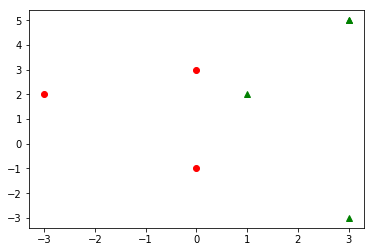

In [40]:
for i in range(len(X_trans)):
    if y[i] == 1:
        plt.plot(X_trans[i][0],X_trans[i][1], 'g^')
    else:
        plt.plot(X_trans[i][0],X_trans[i][1], 'ro')



In [32]:
X_trans

[[-3, 2], [0, -1], [0, 3], [1, 2], [3, -3], [3, 5], [3, 5]]

In [46]:
s = svm.SVC(kernel='poly', degree = 2, C=10000000000000, coef0=1.0, gamma=1.0)
s.fit(X,y)

SVC(C=10000000000000, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape=None, degree=2, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
len(s.support_vectors_)

5

In [5]:
def generatePts(N):
    X = [np.array([ran.uniform(-1,1), ran.uniform(-1,1)]) for i in range(N)]
    y = np.array([np.sign(pt[1]-pt[0]+.25*np.sin(np.pi*pt[0])) for pt in X])
    return X,y

In [74]:
scores = []
for i in range(1000):
    X,y = generatePts(100)
    s = svm.SVC(kernel = 'rbf', gamma=1.5, C=1000000000000)
    s.fit(X,y)
    scores.append(s.score(X,y))

In [77]:
print("E_in not 0: " + str(1000 - scores.count(1)) + "  times out of 1000")

E_in not 0: 0  times out of 1000


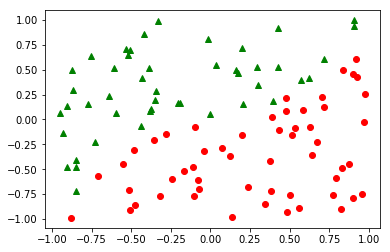

In [78]:
for i in range(len(X)):
    if y[i] == 1:
        plt.plot(X[i][0],X[i][1], 'g^')
    else:
        plt.plot(X[i][0],X[i][1], 'ro')



In [7]:
def rbf(gamma,x,u):
    return np.exp(-gamma * np.linalg.norm(x-u)**2)

In [8]:
def rbf_h(x,centers,w, gamma):
    result = 0.0
    for i in range (len(centers)):
        result += w[i] * rbf(gamma,x,centers[i])
    
    return np.sign(result)

In [106]:
K=9
gamma = 1.5
svm_wins = 0
bad = False
runs = 0
for j in range(1000):
    bad = False
    X,y = generatePts(100)
    centers = [np.array([ran.uniform(-1,1), ran.uniform(-1,1)]) for i in range(K)]
    prev = [np.array([0, 0]) for i in range(K)]
    while True:
        changed = []
        for i in range(len(centers)):
            changed.append(prev[i][0] != centers[i][0])
            changed.append(prev[i][1] != centers[i][1])

        if not True in changed:
            break




        clusters = [[] for i in range(K)]
        for pt in X:
            best_index = 0
            best = np.linalg.norm(pt-centers[0])
            for i in range(1, len(centers)):
                dist = np.linalg.norm(pt-centers[i])
                if dist < best:
                    best_index = i
                    best = dist
            clusters[best_index].append(pt)

        if clusters.count([])>=1:
            bad = True
            break 

        prev = [center for center in centers]


        for i in range(len(clusters)):
            tot = np.array([sum(i) for i in zip(*clusters[i])])
            av = tot / len(clusters[i])

            centers[i] = av

    PHI = np.matrix([[rbf(gamma,x,u) for u in centers] for x in X])

    pi = np.linalg.pinv(PHI)
    w = np.array(pi @ y)[0]
    
    s = svm.SVC(kernel = 'rbf', gamma=1.5, C=1000000000000)
    s.fit(X,y)
    
    if s.score(X,y) != 1.0:
        break
    
    if not bad:
        X_test, y_test = generatePts(1000)
        l_results = [rbf_h(X_test[i], centers, w, gamma) == y_test[i] for i in range(len(X_test))]
        l_score = l_results.count(True) / len(l_results)
        svm_score = s.score(X_test,y_test)

        if svm_score > l_score: svm_wins += 1

        runs +=1


In [107]:
svm_wins, runs

(812, 919)

In [103]:
K=12
gamma = 1.5
svm_wins = 0
bad = False
runs = 0
for j in range(1000):
    bad = False
    X,y = generatePts(100)
    centers = [np.array([ran.uniform(-1,1), ran.uniform(-1,1)]) for i in range(K)]
    prev = [np.array([0, 0]) for i in range(K)]
    while True:
        changed = []
        for i in range(len(centers)):
            changed.append(prev[i][0] != centers[i][0])
            changed.append(prev[i][1] != centers[i][1])

        if not True in changed:
            break




        clusters = [[] for i in range(K)]
        for pt in X:
            best_index = 0
            best = np.linalg.norm(pt-centers[0])
            for i in range(1, len(centers)):
                dist = np.linalg.norm(pt-centers[i])
                if dist < best:
                    best_index = i
                    best = dist
            clusters[best_index].append(pt)

        if clusters.count([])>=1:
            bad = True
            break 

        prev = [center for center in centers]


        for i in range(len(clusters)):
            tot = np.array([sum(i) for i in zip(*clusters[i])])
            av = tot / len(clusters[i])

            centers[i] = av

    PHI = np.matrix([[rbf(gamma,x,u) for u in centers] for x in X])

    pi = np.linalg.pinv(PHI)
    w = np.array(pi @ y)[0]
    
    s = svm.SVC(kernel = 'rbf', gamma=1.5, C=1000000000000)
    s.fit(X,y)
    
    if s.score(X,y) != 1.0:
        break
    
    if not bad:
        X_test, y_test = generatePts(1000)
        l_results = [rbf_h(X_test[i], centers, w, gamma) == y_test[i] for i in range(len(X_test))]
        l_score = l_results.count(True) / len(l_results)
        svm_score = s.score(X_test,y_test)

        if svm_score > l_score: svm_wins += 1

        runs +=1



In [104]:
svm_wins, runs

(626, 791)

In [2]:
def do_lloyds(X,y,K,gamma):
    centers = [np.array([ran.uniform(-1,1), ran.uniform(-1,1)]) for i in range(K)]
    prev = [np.array([0, 0]) for i in range(K)]
    while True:
        changed = []
        for i in range(len(centers)):
            changed.append(prev[i][0] != centers[i][0])
            changed.append(prev[i][1] != centers[i][1])

        if not True in changed:
            break




        clusters = [[] for i in range(K)]
        for pt in X:
            best_index = 0
            best = np.linalg.norm(pt-centers[0])
            for i in range(1, len(centers)):
                dist = np.linalg.norm(pt-centers[i])
                if dist < best:
                    best_index = i
                    best = dist
            clusters[best_index].append(pt)

        if clusters.count([])>=1:
            return

        prev = [center for center in centers]


        for i in range(len(clusters)):
            tot = np.array([sum(i) for i in zip(*clusters[i])])
            av = tot / len(clusters[i])

            centers[i] = av

    PHI = np.matrix([[rbf(gamma,x,u) for u in centers] for x in X])

    pi = np.linalg.pinv(PHI)
    w = np.array(pi @ y)[0]
    
    
    l_results_in = [rbf_h(X[i], centers, w, gamma) == y[i] for i in range(len(X))]
    l_score_in = l_results_in.count(True) / len(l_results_in)
    
    X_test, y_test = generatePts(1000)
    l_results_out = [rbf_h(X_test[i], centers, w, gamma) == y_test[i] for i in range(len(X_test))]
    l_score_out = l_results_out.count(True) / len(l_results_out)
    
    return 1-l_score_in, 1-l_score_out

In [131]:
k_9 = []
k_12 = []
for i in range(100):
    X,y = generatePts(100)
    k_9r = do_lloyds(X,y,9,1.5)
    k_12r = do_lloyds(X,y,12,1.5)
    if type(k_9r) == tuple and type(k_12r) == tuple:
        k_9.append(k_9r)
        k_12.append(k_12r)

In [135]:
a = [0,'a']
b = [0,'b']
c = [0, 'c']
d = [0, 'd']
e = [0, 'e']

for i in range(len(k_9)):
    if k_9[i][0] > k_12[i][0] and k_9[i][1] < k_12[i][1]:
        a[0] += 1
    elif k_9[i][0] < k_12[i][0] and k_9[i][1] > k_12[i][1]:
        b[0] += 1
    elif k_9[i][0] < k_12[i][0] and k_9[i][1] < k_12[i][1]:
        c[0] += 1
    elif k_9[i][0] > k_12[i][0] and k_9[i][1] > k_12[i][1]:
        d[0] += 1
    elif k_9[i][0] == k_12[i][0] and k_9[i][1] == k_12[i][1]:
        e[0] += 1

In [137]:
max(a,b,c,d,e)[1]

'd'

In [141]:
g1 = []
g2 = []

for i in range(100):
    X,y = generatePts(100)
    g1r = do_lloyds(X,y,9,1.5)
    g2r = do_lloyds(X,y,9,2)
    if type(g1r) == tuple and type(g2r) == tuple:
        g1.append(g1r)
        g2.append(g2r)

In [142]:
a = [0,'a']
b = [0,'b']
c = [0, 'c']
d = [0, 'd']
e = [0, 'e']

for i in range(len(k_9)):
    if g1[i][0] > g2[i][0] and g1[i][1] < g2[i][1]:
        a[0] += 1
    elif g1[i][0] < g2[i][0] and g1[i][1] > g2[i][1]:
        b[0] += 1
    elif g1[i][0] < g2[i][0] and g1[i][1] < g2[i][1]:
        c[0] += 1
    elif g1[i][0] > g2[i][0] and g1[i][1] > g2[i][1]:
        d[0] += 1
    elif g1[i][0] == g2[i][0] and g1[i][1] == g2[i][1]:
        e[0] += 1

In [143]:
max(a,b,c,d,e)[1]

'c'

In [9]:
e_ins = []
for i in range(1000): 
    X,y = generatePts(100)
    result = do_lloyds(X,y,9,1.5)
    if type(result) == tuple:
        e_ins.append(result[0])

In [10]:
e_ins.count(0)

23

In [11]:
len(e_ins)

913